## Sharrey Suhendra (ssuhen02) 1351662

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
n_runs = 16
runs = []
start_time_sec = time.time()

for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    runs.append(mlp_lbfgs)

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.1 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.1 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.1 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.1 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.2 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.2 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.2 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.2 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.2 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

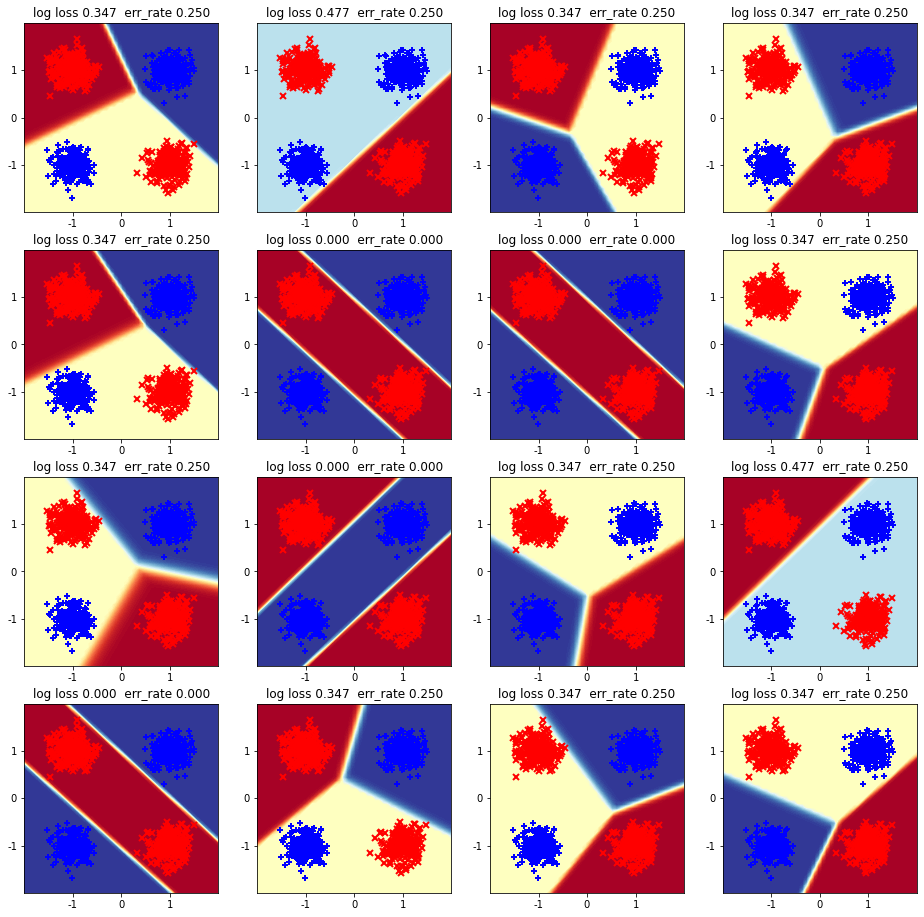

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(runs[j+(4*i)], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

- 4/16 = 1/4 of runs reach 0 training error which means 25% of the runs predicted all inputs correctly.
- Other models have about 0.25 error rate which means for each of these models it predicted 75% of the training data correctly and remaining 25% incorrectly.
- These L-BFGS + ReLU models are converged rapidly such that it only takes 0.0-0.3 seconds, with 39 iterations as the longest iteration on one of the models. The average number of iteration is about 29 iterations.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
n_runs = 16
runs2 = []
start_time_sec = time.time()

for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    runs2.append(mlp_lbfgs)

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


finished LBFGS run  1/16 after    0.0 sec |  58 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 106 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.2 sec |  77 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.2 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.2 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.3 sec |  50 iters | converged    | loss 0.000


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


finished LBFGS run  8/16 after    0.3 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  9/16 after    0.3 sec |  62 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.4 sec | 151 iters | NOT converged | loss 0.347
finished LBFGS run 11/16 after    0.4 sec |  79 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.5 sec |  97 iters | converged    | loss 0.347
finished LBFGS run 13/16 after    0.5 sec |  59 iters | converged    | loss 0.347
finished LBFGS run 14/16 after    0.5 sec |  33 iters | converged    | loss 0.478
finished LBFGS run 15/16 after    0.6 sec |  53 iters | converged    | loss 0.000
finished LBFGS run 16/16 after    0.6 sec |  61 iters | converged    | loss 0.000


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

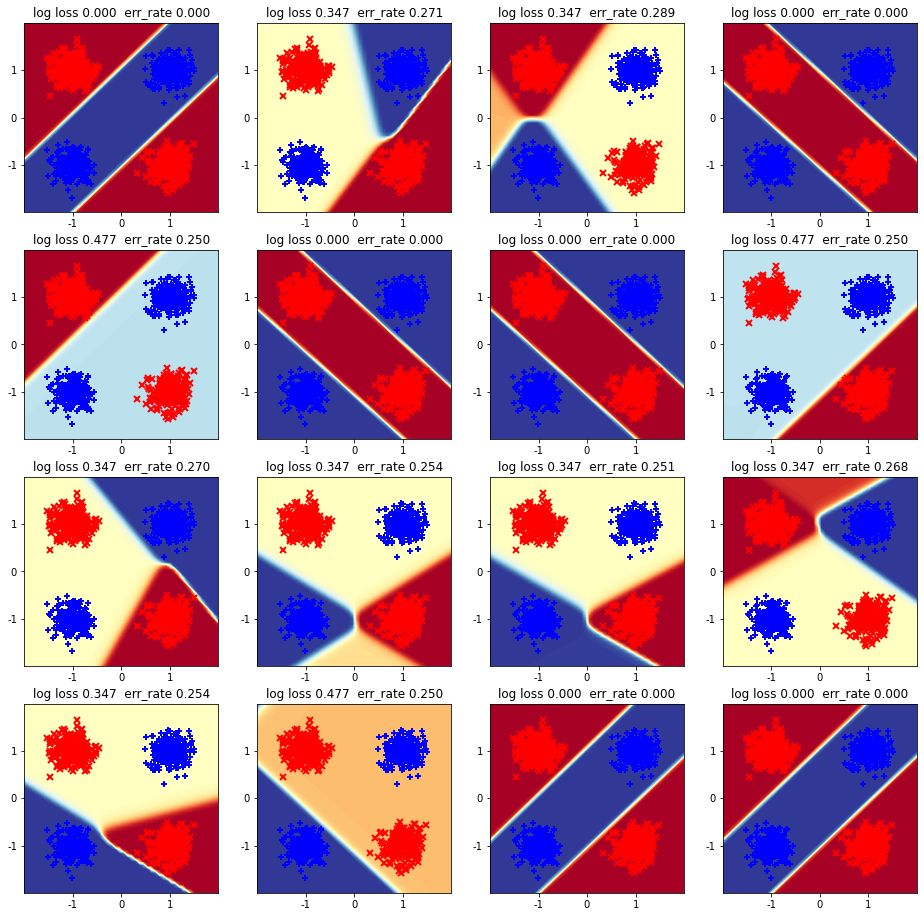

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(runs2[j + (4*i)], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

- 6/16 = 3/8 of runs reach 0 training error which means 37.5% of the runs predicted all inputs correctly.
- Other models have an error rate of above 0.25 and below 0.3 which means for each of these models compared to 2(a), it predicted less than 75% of the training data correctly and more than 25% incorrectly.
- These SGD + Sigmoid models took more time to converge compared to using the ReLU activation. It took 0.1-0.7 seconds, with iterations ranging 33-151 iterations. The average number of iteration is around the 60s, which is definitely slower than the L-BFGS solver with ReLU activation models

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
n_runs = 16
start_time_sec = time.time()
runs3 = []

for i in range(16):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    runs3.append(mlp_sgd)


finished SGD run  0/16 after    5.1 sec | 267 epochs | converged     | loss 0.347
finished SGD run  1/16 after   11.1 sec | 307 epochs | converged     | loss 0.478
finished SGD run  2/16 after   15.7 sec | 239 epochs | converged     | loss 0.347
finished SGD run  3/16 after   23.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  4/16 after   28.6 sec | 275 epochs | converged     | loss 0.347
finished SGD run  5/16 after   36.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  6/16 after   44.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   49.2 sec | 273 epochs | converged     | loss 0.347
finished SGD run  8/16 after   53.6 sec | 219 epochs | converged     | loss 0.347
finished SGD run  9/16 after   63.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 10/16 after   71.2 sec | 394 epochs | converged     | loss 0.478
finished SGD run 11/16 after   79.1 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

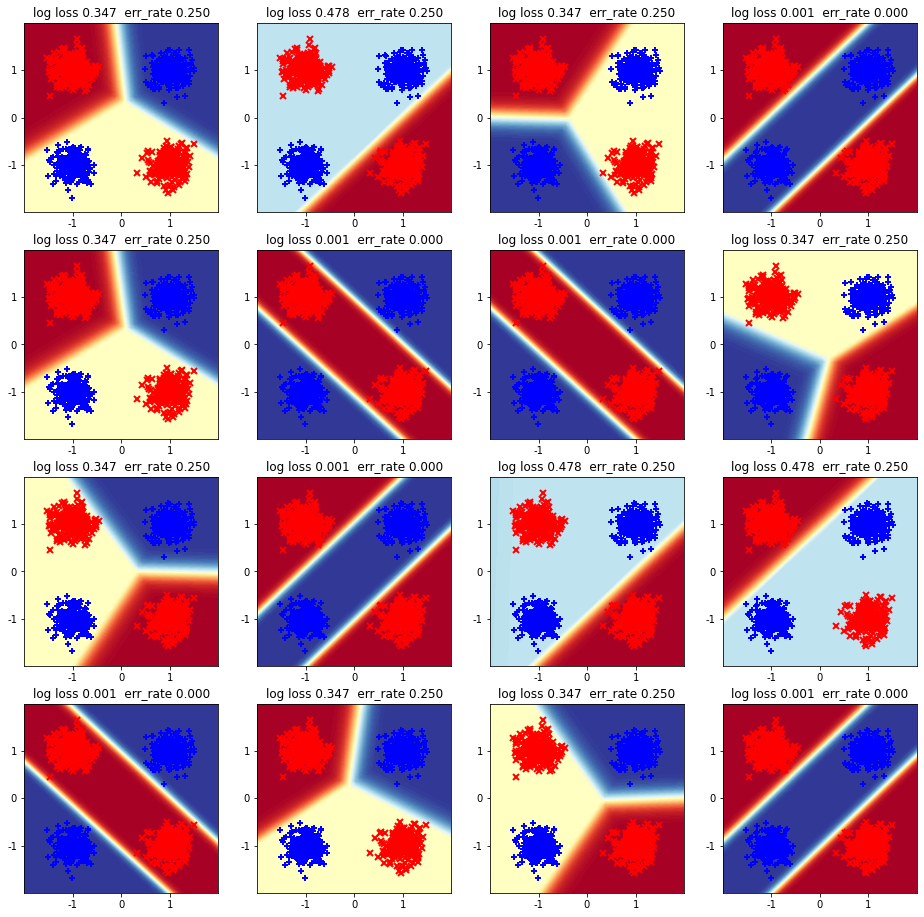

In [8]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(runs3[j + (4*i)], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

- 6/16 = 3/8 of runs reach 0 training error which means 37.5% of the runs predicted all inputs correctly
- Other models have an error rate of 0.25 and which means for each of these models it predicted 75% of the training data correctly and 25% incorrectly.
- These SGD + ReLU models were much slower and took more time to convert compared to the L-BFGS solver models with either ReLU or Sigmoid activation functions. This can be seen by the number of iterations, that there were 7 models that were still yet to converge when there have been 400 iterations. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

Using the same ReLU activation function, the runs with SGD solver had a lower training error compared to the L-BFGS solver. 37.5% of SGD runs correctly predicted all inputs whereas it's only 25% for L-BFGS runs. The SGD runs also took more time to run all the models such that some of them were yet to converge, given that both SGD and L-BFGS models were given the same training set.

These difference exist because SGD uses the first derivative of the network loss whereas L-BFGS uses both the first and second derivatives, which is why L-BFGS was able to be quicker, optimizing the models and allowing them to converge rapidly through the extra second derivative function that it has.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
n_runs = 16
start_time_sec = time.time()
runs4 = []

for i in range(16):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    runs4.append(mlp_sgd)

finished SGD run  0/16 after    3.4 sec | 161 epochs | converged     | loss 0.693
finished SGD run  1/16 after   11.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  2/16 after   20.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   24.4 sec | 215 epochs | converged     | loss 0.693
finished SGD run  4/16 after   32.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  5/16 after   40.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  6/16 after   48.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   56.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  8/16 after   64.1 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   71.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   73.9 sec | 124 epochs | converged     | loss 0.693
finished SGD run 11/16 after   81.4 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

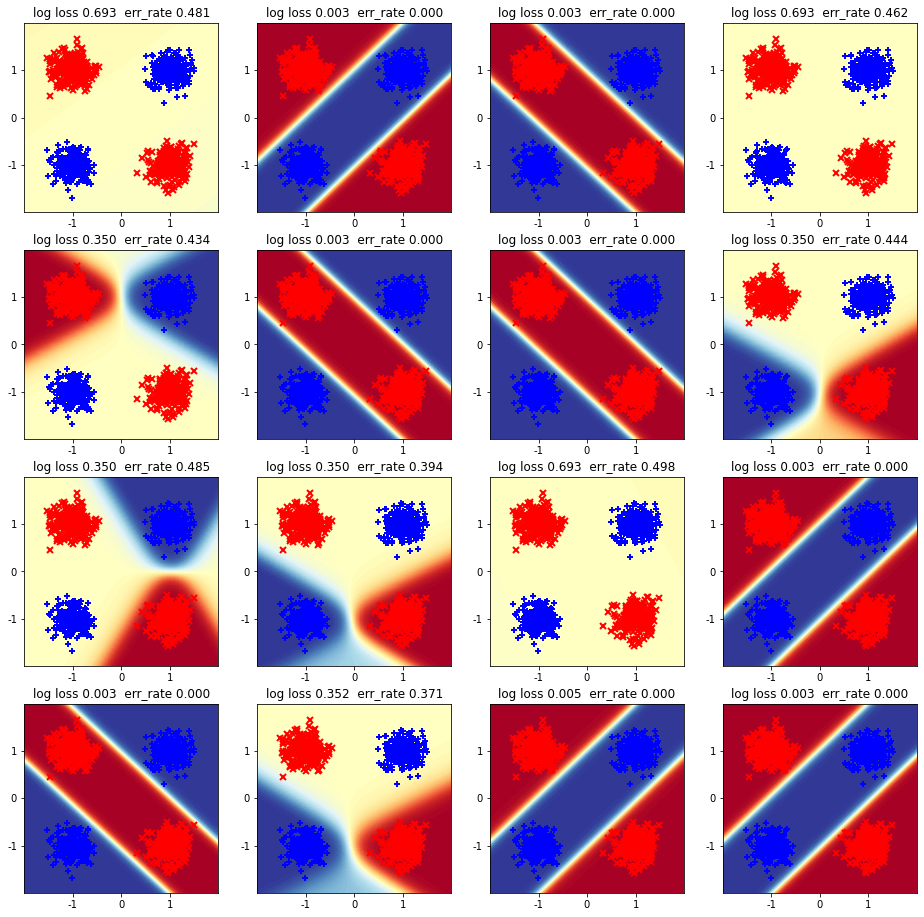

In [10]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(runs4[j + (4*i)], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

- 8/16 = 1/2 of runs reach 0 training error which means 50% of the runs predicted all inputs correctly
- Other models have an error rate ranging 0.371 to 498 which means these models predicted at least 37.1% of the training data incorrectly.
- These SGD + Sigmoid models were much slower and took more time to convert compared to the L-BFGS solver models with either ReLU or Sigmoid activation functions. This can be seen by the number of iterations, only 3 models converged and the rest were still yet to converge when there have been 400 iterations.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

Using the same logistic activation function, the runs with SGD solver had a lower training error compared to the L-BFGS solver. 50% of SGD runs correctly predicted all inputs whereas it's only 37.5% for L-BFGS runs. Just like the case in using the ReLU activation function, this SGD solver runs also took more time, even longer than using ReLU, and that most of the models did not converge. This difference exist because, as stated before, SGD only uses first derivative whereas L-BFGS has the advantage to converge faster by using both first and second derivative. 

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

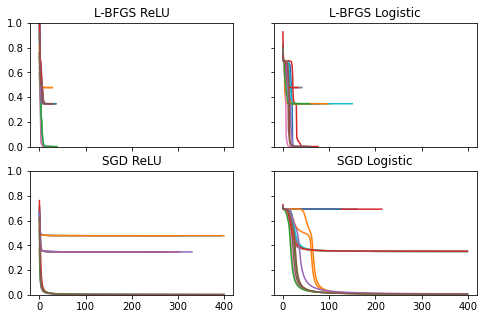

In [11]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

for i in range(16):
    ax_grid[0,0].plot(runs[i].loss_curve_)
    ax_grid[0,1].plot(runs2[i].loss_curve_)
    ax_grid[1,0].plot(runs3[i].loss_curve_)
    ax_grid[1,1].plot(runs4[i].loss_curve_)

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

The ReLU function seems easier to optimize. Based on the two ReLU plots on the left hand side, the loss curves are much steeper and drops pretty fast when the iterations are at its lowest, compared to the right had side where the models are not as consistent. 

In general, the Logistic function requires the most iterations as based on the Logistic plots on the right hand side show more curves traveling to a longer horizontal distance (meaning more iterations) compared to the left hand side. It can also be deducted from the time taken from prior steps, L-BFGS Logistic is slower than L-BFGS ReLu, and SGD Logistic is slower the SGD ReLU.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

No I am not convinced that the ReLU function is always easiest to optimize.\
3 additional experimental comparisons:
1. Applying other solvers besides L-BFGS and SGD to ensure that the ReLU optimizes not only in the 2 solvers but other solvers as well.
2. Applying more different datas that has different number of features to see if there is a consistensy whether ReLU is easer to optimize.
3. Applying other actication functions (e.g. tanh) besides ReLU and Logistic Sigmoid to see if there are other functions that results in lower error rates.